<a href="https://colab.research.google.com/github/Nytrix-09/Physical_Adversary_Attack/blob/main/Physical_Adversary_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""
import cv2
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
tf.executing_eagerly()

import math
from tensorflow import keras
from PIL import Image
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style


IMG_HEIGHT = 30
IMG_WIDTH = 30

In [ ]:
IMG_HEIGHT = 30
IMG_WIDTH = 30

# List of classes of the traffic sign classification model.
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }


In [8]:
#load the GTSRB Model
model = tf.keras.models.load_model('trained_model.h5')
path = 'benign_09.png' # Name of your image file


1/1 [==============================] - 0s 27ms/step
Predicted as Speed limit (50km/h) Sign with 1.3234301e-10 probability


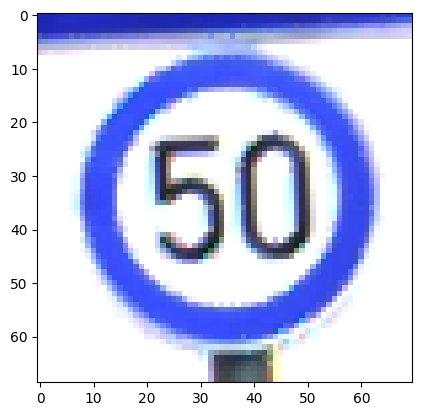

In [15]:
#Task 1

import glob
cnt = 1
import torch

traffic_sign = cv2.imread(path)

#Prepare the extracted sign as input for GTSRB model
img = np.array(traffic_sign)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) /255

#Calssify traffic sign
pred = model.predict(np.expand_dims(img, axis=0))
label = np.array([classes[i] for i in pred.argmax(axis=1)])
print("Predicted as",label[0], "Sign with", pred[0][14], "probability")
plt.imshow(traffic_sign)

In [10]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.7 MB/s eta 0:00:00


In [11]:
#Task 2

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
from tqdm.auto import tqdm


N = 1
alpha =0.75

img_size = img.shape

def score_func(trial):
    imgTrails = np.array(traffic_sign)
    overlay = img.copy()
    # Declaring the fixed length and breadth of the patch
    b = 20
    l = 20

    for i in range(N):
        # Parameters for Physical Adversary
        # Parameters to optimize are declared as follows:
        # param = int(trial.suggest_discrete_uniform(f'param{i}', minimum_value, maximum_value, interval))
        # x and y are the coordinates of the patch on the traffic sign surface to optimize.
        x = int(trial.suggest_discrete_uniform(f'x{i}', 0, img_size[0], 1))
        y = int(trial.suggest_discrete_uniform(f'y{i}', 0, img_size[1], 1))

        color  = (24, 23, 23)
        start_point = (x, y)
        end_point = (x+b, y+l)

        # Synthesize image with physical adversary
        overlay = cv2.rectangle(imgTrails, start_point, end_point, color, -1)

    imgTrails = overlay
    area = l*b
    imgTrails = cv2.cvtColor(imgTrails, cv2.COLOR_RGB2BGR)
    imgTrails = cv2.resize(imgTrails, (IMG_WIDTH, IMG_HEIGHT)) / 255

    pred = model.predict(np.expand_dims(imgTrails, axis=0))
    # pred has the list of probabilities for all classes
    # For example, if you want the probability of class number 9 ('No passing'), this is given by the content of pred[0][9]
    # The classes and their numbers are above in the "classes" structure.
    label = 11
    # Rewrite the loss function (loss) below to perform untargeted attack
    # Your loss function depends on the traffic sign image you were given.
    loss = -np.log(pred[0][label] / np.sum(pred))


    return loss

best = None
best_area = np.inf

# The below code finds the best set of parameters from optimization
for _ in tqdm(range(5)):
    print(_)
    study = optuna.create_study()
    study.optimize(score_func, 500)

    _best = study.best_params

    area = study.best_value

    if best_area > area:
        best_area = area
        best = _best


  0%|          | 0/5 [00:00<?, ?it/s]

0


<ipython-input-11-a8971091808c>:25: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  x = int(trial.suggest_discrete_uniform(f'x{i}', 0, img_size[0], 1))
<ipython-input-11-a8971091808c>:26: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  y = int(trial.suggest_discrete_uniform(f'y{i}', 0, img_size[1], 1))


1/1 [==============================] - 0s 27ms/step
1
1/1 [==============================] - 0s 22ms/step
2
1/1 [==============================] - 0s 48ms/step
3
1/1 [==============================] - 0s 26ms/step
4
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step
Prediction of the optimized patch: Ahead only, with probability 0.30686876


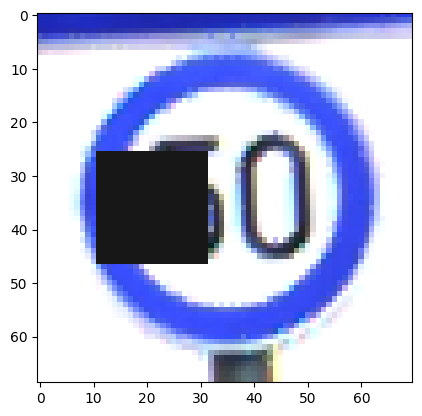

In [12]:
# Execute the optimization

img = np.array(traffic_sign)

area = 0

b = 20
l = 20

# Synthesize image with best parameters
for i in range(N):
    # The below two lines infer the best optimized parameters for the attack
    x = int(best[f'x{i}'])
    y = int(best[f'y{i}'])
    color  = (24, 23, 23)
    start_point = (x, y)
    end_point = (x+b, y+l)
    # The below line places the patch at the best x, y position
    overlay = cv2.rectangle(img, start_point, end_point, color, -1)

img = overlay
arrayImg = np.array(img)

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('task2_result.png', img)
img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) / 255


pred = model.predict(np.expand_dims(img, axis=0))
# print(pred.argmax(axis=1))
label = np.array([classes[i] for i in pred.argmax(axis=1)])
print('Prediction of the optimized patch: '+ str(label[0]) +', with probability '+str(pred.max()))
plt.imshow(arrayImg)

In [13]:

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
from tqdm.auto import tqdm


N = 1
alpha =0.75


img_size = img.shape

def score_func(trial):
    imgTrails = np.array(traffic_sign)
    overlay = img.copy()
    # Declaring the fixed length and breadth of the patch
    b = 20
    l = 20

    for i in range(N):
        # Parameters for Physical Adversary
        # Parameters to optimize are declared as follows:
        # param = int(trial.suggest_discrete_uniform(f'param{i}', minimum_value, maximum_value, interval))
        # x and y are the coordinates of the patch on the traffic sign surface to optimize.
        x = int(trial.suggest_discrete_uniform(f'x{i}', 0, img_size[0], 1))
        y = int(trial.suggest_discrete_uniform(f'y{i}', 0, img_size[1], 1))

        color  = (24, 23, 23)
        start_point = (x, y)
        end_point = (x+b, y+l)

        # Synthesize image with physical adversary
        overlay = cv2.rectangle(imgTrails, start_point, end_point, color, -1)

    imgTrails = overlay
    area = l*b
    imgTrails = cv2.cvtColor(imgTrails, cv2.COLOR_RGB2BGR)
    imgTrails = cv2.resize(imgTrails, (IMG_WIDTH, IMG_HEIGHT)) / 255

    pred = model.predict(np.expand_dims(imgTrails, axis=0))
    # pred has the list of probabilities for all classes
    # probability of class number 9 ('No passing') is given by pred[0][9]
    label = 40
    # We change the loss to make a targetted attack
    # Your loss function is given to you in the pdf file
    loss = -np.log(pred[0][label] / np.sum(pred))


    return loss

best = None
best_area = np.inf

# Find the best set of parameters from optimization
for _ in tqdm(range(5)):
    print(_)
    study = optuna.create_study()
    study.optimize(score_func, 500)

    _best = study.best_params

    area = study.best_value

    if best_area > area:
        best_area = area
        best = _best



  0%|          | 0/5 [00:00<?, ?it/s]

0
1/1 [==============================] - 0s 23ms/step


<ipython-input-13-137e80fdbb03>:24: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  x = int(trial.suggest_discrete_uniform(f'x{i}', 0, img_size[0], 1))
<ipython-input-13-137e80fdbb03>:25: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  y = int(trial.suggest_discrete_uniform(f'y{i}', 0, img_size[1], 1))


1/1 [==============================] - 0s 24ms/step
1
1/1 [==============================] - 0s 25ms/step
2
1/1 [==============================] - 0s 24ms/step
3
1/1 [==============================] - 0s 46ms/step
4
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step
Prediction of the optimized patch: Roundabout mandatory, with probability 0.99994326


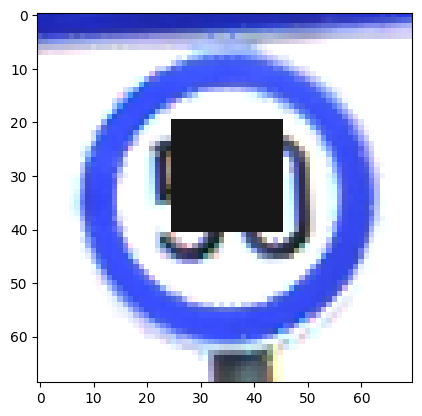

In [14]:
# Execute the optimization

img = np.array(traffic_sign)

area = 0

b = 20
l = 20

# Synthesize image with best parameters
for i in range(N):
    # The below two lines infer the best optimized parameters for the attack
    x = int(best[f'x{i}'])
    y = int(best[f'y{i}'])
    color  = (24, 23, 23)
    start_point = (x, y)
    end_point = (x+b, y+l)
    # The below line places the patch at the best x, y position
    overlay = cv2.rectangle(img, start_point, end_point, color, -1)

img = overlay
arrayImg = np.array(img)

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('task3_result.png', img)
img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) / 255


pred = model.predict(np.expand_dims(img, axis=0))
label = np.array([classes[i] for i in pred.argmax(axis=1)])
print('Prediction of the optimized patch: '+ str(label[0]) +', with probability '+str(pred.max()))
plt.imshow(arrayImg)

In [16]:
#Task 4 (For graduate students)

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
from tqdm.auto import tqdm


N = 1
alpha =0.75

def score_func(trial):
    imgTrails = np.array(traffic_sign)
    overlay = img.copy()
    # Declaring the fixed length (l) and breadth (b) of the patch
    # Here the breadth and length are fixed to 20
    b = 20
    l = 20

    for i in range(N):
        # Parameters to optimize are declared as follows:
        # param = int(trial.suggest_discrete_uniform(f'param{i}', minimum_value, maximum_value, interval))
        # x and y are the coordinates of the patch on the traffic sign surface to optimize.
        # To complete the task, modify this code to include optimization for the minimum size of the patch.
        x = int(trial.suggest_discrete_uniform(f'x{i}', 0, img_size[0], 1))
        y = int(trial.suggest_discrete_uniform(f'y{i}', 0, img_size[1], 1))
        b = int(trial.suggest_discrete_uniform(f'b{i}', 0, 15, 1))
        l = int(trial.suggest_discrete_uniform(f'l{i}', 0, 15, 1))



        color  = (24, 23, 23)
        start_point = (x, y)
        end_point = (x+b, y+l)

        # This code synthesizes the image with patch at position x, y.
        overlay = cv2.rectangle(imgTrails, start_point, end_point, color, -1)

    imgTrails = overlay
    area = l*b
    imgTrails = cv2.cvtColor(imgTrails, cv2.COLOR_RGB2BGR)
    imgTrails = cv2.resize(imgTrails, (IMG_WIDTH, IMG_HEIGHT)) / 255

    pred = model.predict(np.expand_dims(imgTrails, axis=0))
    # pred has the list of probabilities for all classes
    # probability of class number 9 ('No passing') is given by pred[0][9]
    label = 11
    print(label, pred[0][11])

    # You can keep the loss function the same as in task 2
    loss = pred[0][label]


    return loss

best = None
best_area = np.inf

# Find the best set of parameters from optimization
for _ in tqdm(range(5)):
    print(_)
    study = optuna.create_study()
    study.optimize(score_func, 500)

    _best = study.best_params

    area = study.best_value

    if best_area > area:
        best_area = area
        best = _best


  0%|          | 0/5 [00:00<?, ?it/s]

0
1/1 [==============================] - 0s 24ms/step
11 3.7918585e-10
1/1 [==============================] - 0s 22ms/step
11 2.7402256e-09


<ipython-input-16-868668615a64>:24: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  x = int(trial.suggest_discrete_uniform(f'x{i}', 0, img_size[0], 1))
<ipython-input-16-868668615a64>:25: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  y = int(trial.suggest_discrete_uniform(f'y{i}', 0, img_size[1], 1))
<ipython-input-16-868668615a64>:26: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  b = int(trial.suggest_discrete_uniform(f'b{i}', 0, 15, 1))
<ipython-input-16-868668615a64>:27: FutureWarning: suggest

1/1 [==============================] - 0s 34ms/step
11 9.601195e-12
1/1 [==============================] - 0s 24ms/step
11 3.2174573e-06
1/1 [==============================] - 0s 24ms/step
11 4.4080437e-08
1/1 [==============================] - 0s 25ms/step
11 2.565099e-11
1/1 [==============================] - 0s 27ms/step
11 2.1862278e-11
1/1 [==============================] - 0s 21ms/step
11 1.3469795e-10
1/1 [==============================] - 0s 30ms/step
11 7.5558275e-12
1/1 [==============================] - 0s 22ms/step
11 2.039982e-11
1/1 [==============================] - 0s 32ms/step
11 2.8003369e-11
1/1 [==============================] - 0s 25ms/step
11 1.6020245e-10
1/1 [==============================] - 0s 24ms/step
11 2.5252292e-11
1/1 [==============================] - 0s 30ms/step
11 3.9672372e-13
1/1 [==============================] - 0s 28ms/step
11 2.6237217e-09
1/1 [==============================] - 0s 25ms/step
11 1.3138372e-10
1/1 [==============================] 

1/1 [==============================] - 0s 21ms/step
Prediction of the optimized patch: Speed limit (100km/h), with probability 0.7292707


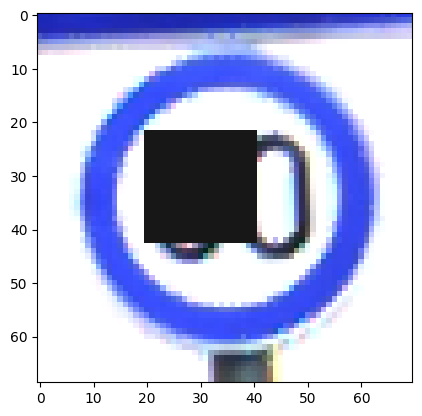

In [19]:
# Execute the optimization

img = np.array(traffic_sign)

area = 0


# Infer the best values instead of the below two lines
b = 20
l = 20

# Synthesize image with best parameters
for i in range(N):
    # The below two lines infer the best optimized parameters for the attack
    x = int(best[f'x{i}'])
    y = int(best[f'y{i}'])

    # Here infer two the other parameters you optimized for based on the names you gave to the parameters


    color  = (24, 23, 23)
    start_point = (x, y)

    # Finally, change the patch lenght and breadth from static l and b in the below line
    end_point = (x+b, y+l)
    # The below line places the patch at the best x, y position
    overlay = cv2.rectangle(img, start_point, end_point, color, -1)

img = overlay
arrayImg = np.array(img)

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('task4_result.png', img)
img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) / 255


pred = model.predict(np.expand_dims(img, axis=0))
# print(pred.argmax(axis=1))
label = np.array([classes[i] for i in pred.argmax(axis=1)])
print('Prediction of the optimized patch: '+ str(label[0]) +', with probability '+str(pred.max()))
plt.imshow(arrayImg)